# Elements of Data Science: A First Course 

# COMS W4995 008 2017 3


## Week 8: Project Reporting and Application: Time Series

In [91]:
import pandas as pd
import numpy as np

# To suppress FutureWarnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

np.random.seed(123)

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

## Reading: 

- Dimensionality Reduction: PDSW CH5 In Depth: Principal Component Analysis
- Image Recognition: PDSW CH5 Application: A Face Detection Pipeline

## Today

 - (From last lecture)
  - ROC and AUC
  - Feature Selection
  - Regularization

- Project Reporting

- Time Series

## Project Reporting

### What should go in a report

### Jupyter notebook (review)
  - Markup
  - Images
  - Latex
  - Slides

### Interactive Graphs
  - Bokeh
  - Plotly

### Dashboards
  - Dash
  - Tableau, PowerBI

## TimeSeries

 - Datetimes in pandas 
  - Timestamp
  - Timedelta
 - Resampling
  - Downsampling
  - Upsampling
 - Shifting
 - Windowing

### Datetimes in pandas: Timestamp

In [92]:
from datetime import datetime

In [93]:
# Year Month Day Hour Minute Second
datetime(2017, 11, 2, 19, 45, 55)

datetime.datetime(2017, 11, 2, 19, 45, 55)

In [94]:
# pandas can handle many date formats
dates = pd.to_datetime([datetime(2015, 7, 3),
                        '4th of July, 2015',
                        '2015-Jul-6',
                        '07-07-2015',
                        '20150708'])
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

In [95]:
# dates may not get processed on DataFrame creation
df = pd.DataFrame({'date': ['2014-07-04',
                    '2014-08-04',
                    '2015-07-04',
                    '2015-08-04'],
                   'val': [2,4,6,8]})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
date    4 non-null object
val     4 non-null int64
dtypes: int64(1), object(1)
memory usage: 144.0+ bytes


In [96]:
# can covert using pd.to_datetime()
df.date = pd.to_datetime(df.date)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
date    4 non-null datetime64[ns]
val     4 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 144.0 bytes


In [97]:
# often useful to set date as index
df.set_index('date', inplace=True)
df

,val
date,
2014-07-04,2
2014-08-04,4
2015-07-04,6
2015-08-04,8


In [98]:
# can then index by date
df['2014-07-04':'2015-07-04']

,val
date,
2014-07-04,2
2014-08-04,4
2015-07-04,6


In [99]:
# indexing is also flexible
df['2015']

,val
date,
2015-07-04,6
2015-08-04,8


### Datetimes in pandas: Timedelta

In [100]:
# Timedelta: the difference between datetimes 
df.index[1] - df.index[0]

Timedelta('31 days 00:00:00')

In [101]:
# can operate over entire sets
df.index - df.index[0]

TimedeltaIndex(['0 days', '31 days', '365 days', '396 days'], dtype='timedelta64[ns]', name='date', freq=None)

In [102]:
# works with series as well
s = pd.to_datetime(pd.Series(['2014-07-04','2014-08-04','2015-07-04','2015-08-04']))
s - s[0]

0     0 days
1    31 days
2   365 days
3   396 days
dtype: timedelta64[ns]

### Resampling

- **downsampling**: rougher reslution (days -> months)

- **upsampling**: finer resolution (months -> days)

In [258]:
#from pandas_datareader import data
#twtr = data.DataReader('TWTR', start='2013', end='2018',
#                        data_source='yahoo')

twtr = pd.read_csv('../data/twtr_2013-2018.csv',parse_dates=['Date'])
twtr = twtr.set_index('Date')
twtr.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2013-11-07,50.090000,44.000000,45.099998,44.900002,117701600,44.900002
2013-11-08,46.939999,40.689999,45.930000,41.650002,27925300,41.650002
2013-11-11,43.000000,39.400002,40.500000,42.900002,16113900,42.900002
2013-11-12,43.779999,41.830002,43.660000,41.900002,6316700,41.900002
2013-11-13,42.869999,40.759998,41.029999,42.599998,8688300,42.599998


In [259]:
# for simplicity, just using Close
twtr = twtr.Close

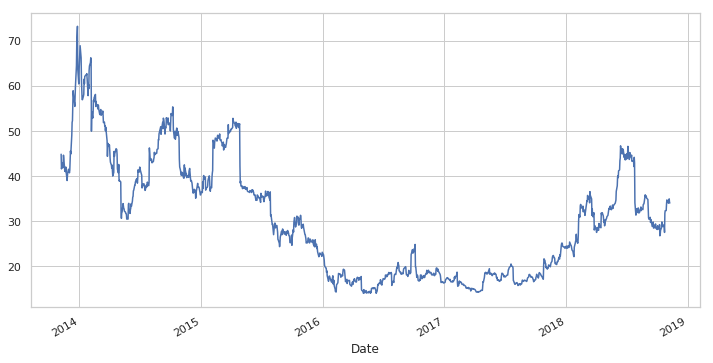

In [260]:
twtr.plot(figsize=(12,6));

In [261]:
# downsampling to business quarter using resample
# resample allows for summarization (like groupby)
twtr_BQ = twtr.resample('BQ')
twtr_BQ

DatetimeIndexResampler [freq=<BusinessQuarterEnd: startingMonth=12>, axis=0, closed=right, label=right, convention=start, base=0]

In [262]:
twtr_BQ.mean().head(3)

Date
2013-12-31    49.657568
2014-03-31    56.587049
2014-06-30    37.854603
Freq: BQ-DEC, Name: Close, dtype: float64

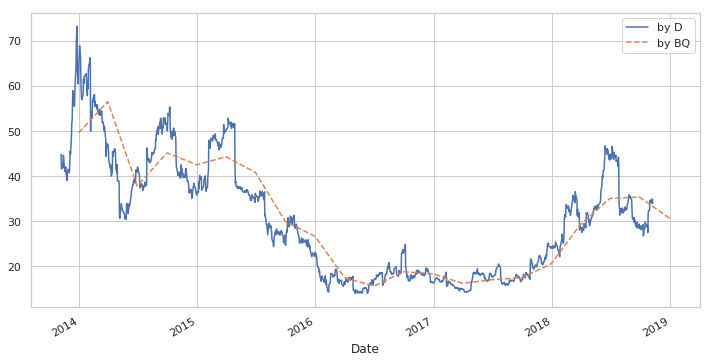

In [263]:
fig = plt.figure(figsize=(12,6))
_ = twtr.plot(style='-', label='by D')
_ = twtr_BQ.mean().plot(style='--', label='by BQ')
_ = plt.legend(loc='upper right');

In [264]:
# what about upsampling? 
# need asfreq to convert from ResamplerObject
twtr_H = twtr.resample('H')
twtr_H.asfreq().head(3)

Date
2013-11-07 00:00:00    44.900002
2013-11-07 01:00:00          NaN
2013-11-07 02:00:00          NaN
Freq: H, Name: Close, dtype: float64

In [265]:
twtr_H.ffill().head(3)

Date
2013-11-07 00:00:00    44.900002
2013-11-07 01:00:00    44.900002
2013-11-07 02:00:00    44.900002
Freq: H, Name: Close, dtype: float64

In [266]:
twtr.index

DatetimeIndex(['2013-11-07', '2013-11-08', '2013-11-11', '2013-11-12',
               '2013-11-13', '2013-11-14', '2013-11-15', '2013-11-18',
               '2013-11-19', '2013-11-20',
               ...
               '2018-10-29', '2018-10-30', '2018-10-31', '2018-11-01',
               '2018-11-02', '2018-11-05', '2018-11-06', '2018-11-07',
               '2018-11-08', '2018-11-09'],
              dtype='datetime64[ns]', name='Date', length=1262, freq=None)

### Shifting

In [267]:
# apply a frequency to the data
print('original freq: ', twtr.index.freq)
twtr.head(3)

original freq:  None


Date
2013-11-07    44.900002
2013-11-08    41.650002
2013-11-11    42.900002
Name: Close, dtype: float64

In [268]:
# setting fill for missing values
twtr_D = twtr.asfreq('D', method='ffill')

print('new freq     : ',twtr_D.index.freq)
twtr_D.head(3)

new freq     :  <Day>


Date
2013-11-07    44.900002
2013-11-08    41.650002
2013-11-09    41.650002
Freq: D, Name: Close, dtype: float64

In [278]:
# shift data 1 year (a year later)
twtr_1Y = twtr_D.tshift(-365)
twtr_1Y.head(3)

Date
2012-11-07    44.900002
2012-11-08    41.650002
2012-11-09    41.650002
Freq: D, Name: Close, dtype: float64

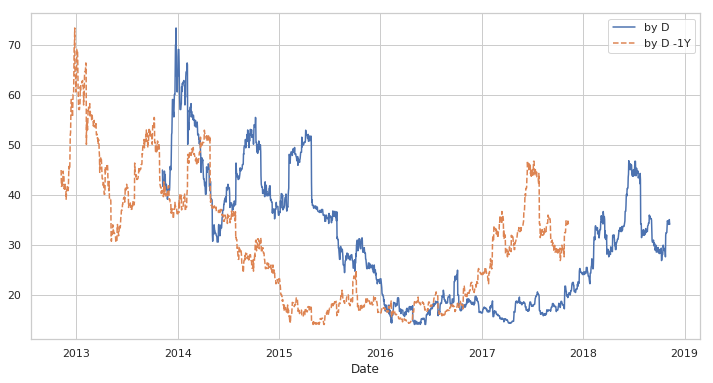

In [279]:
fig = plt.figure(figsize=(12,6))
_ = twtr_D.plot(style='-',label='by D')
_ = twtr_1Y.plot(style='--', label='by D -1Y')
_ = plt.legend()

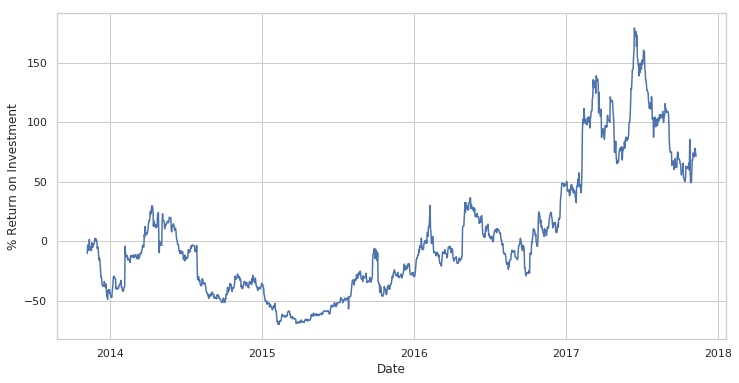

In [286]:
# calculate return on investment;
# (ending price - beginning price) / beginning price
ROI = (twtr_1Y - twtr_D) / twtr_D *100

fig = plt.figure(figsize=(12,6))
_ = ROI.plot(label='ROI')
plt.ylabel('% Return on Investment');

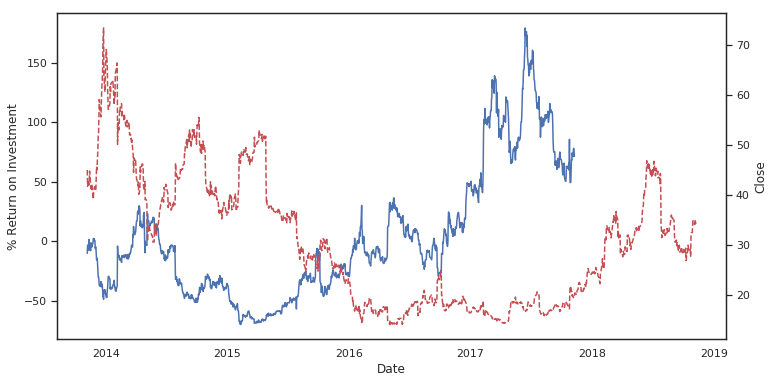

In [295]:
# calculate return on investment;
# (ending price - beginning price) / beginning price
ROI = (twtr_1Y - twtr_D) / twtr_D *100

with sns.axes_style('white'):
    fig,ax1 = plt.subplots(1,1,figsize=(12,6))
    _ = ROI.plot(label='ROI',ax=ax1)
    _ = ax1.set_ylabel('% Return on Investment');
    
    ax2 = ax1.twinx()
    _ = twtr.plot(style='--',color='r',ax=ax2)
    _ = ax2.set_ylabel('Close');

### Windowing

In [296]:
rolling = twtr.rolling(365, center=True)
rolling

Rolling [window=365,center=True,axis=0]

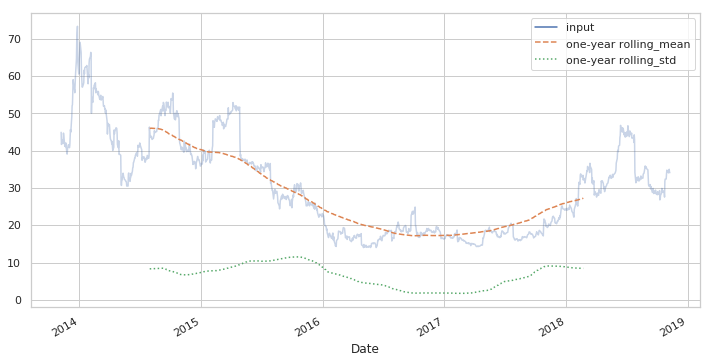

In [300]:
data = pd.DataFrame({'input': twtr,
                     'one-year rolling_mean': rolling.mean(),
                     'one-year rolling_std': rolling.std()})

ax = data.plot(style=['-', '--', ':'], figsize=(12,6))
ax.lines[0].set_alpha(0.3)

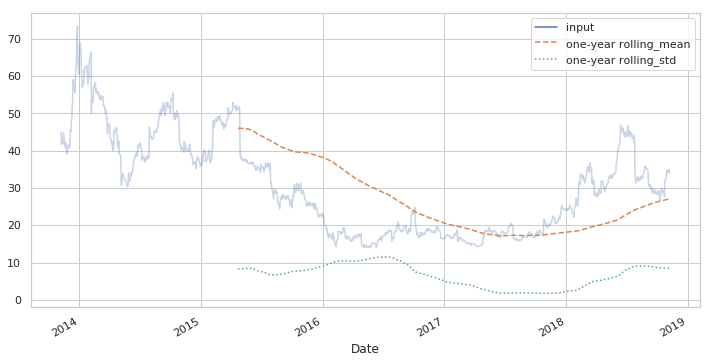

In [302]:
rolling = twtr.rolling(365, center=False)
data = pd.DataFrame({'input': twtr,
                     'one-year rolling_mean': rolling.mean(),
                     'one-year rolling_std': rolling.std()})

ax = data.plot(style=['-', '--', ':'], figsize=(12,6))
ax.lines[0].set_alpha(0.3)

## Example:

In [303]:
# !curl -o ../data/FremontBridge.csv https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD

In [308]:
data = pd.read_csv('../data/FremontBridge.csv', index_col='Date', parse_dates=True)
data.head(3)

,Fremont Bridge West Sidewalk,Fremont Bridge East Sidewalk
Date,,
2012-10-03 00:00:00,4.0,9.0
2012-10-03 01:00:00,4.0,6.0
2012-10-03 02:00:00,1.0,1.0


In [309]:
data.columns = ['West', 'East']
data['Total'] = data.eval('West + East')

In [310]:
data.dropna().describe()

,West,East,Total
count,44512.000000,44512.000000,44512.000000
mean,55.559512,55.930064,111.489576
std,73.608922,80.672775,140.149576
min,0.000000,0.000000,0.000000
25%,7.000000,7.000000,15.000000
50%,30.000000,29.000000,61.000000
75%,73.000000,68.000000,146.000000
max,854.000000,717.000000,1165.000000


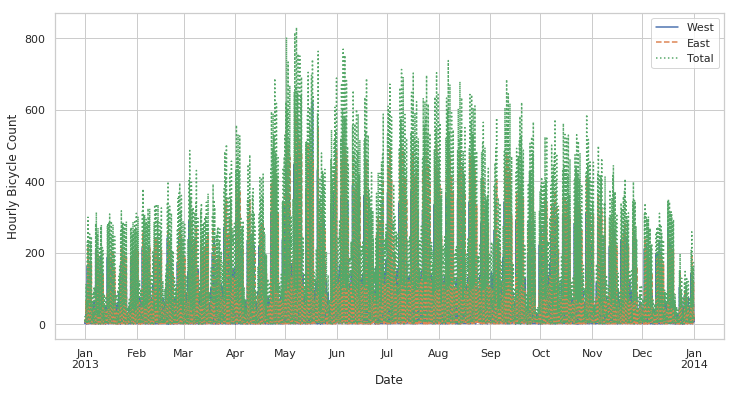

In [317]:
data['2013'].plot(style=['-', '--', ':'],figsize=(12,6))
plt.ylabel('Hourly Bicycle Count');

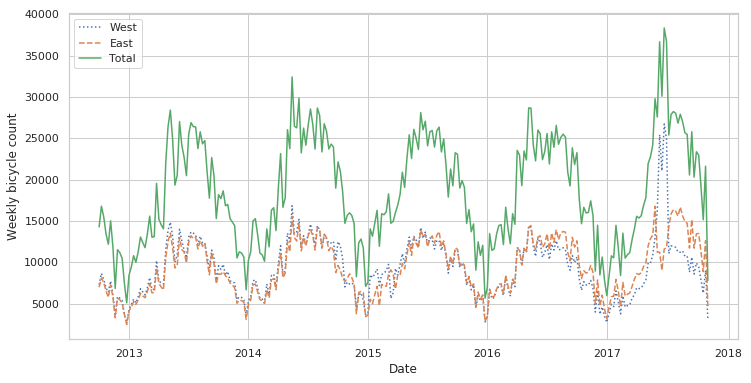

In [318]:
weekly = data.resample('W').sum()
weekly.plot(style=[':', '--', '-'], figsize=(12,6))
plt.ylabel('Weekly bicycle count');

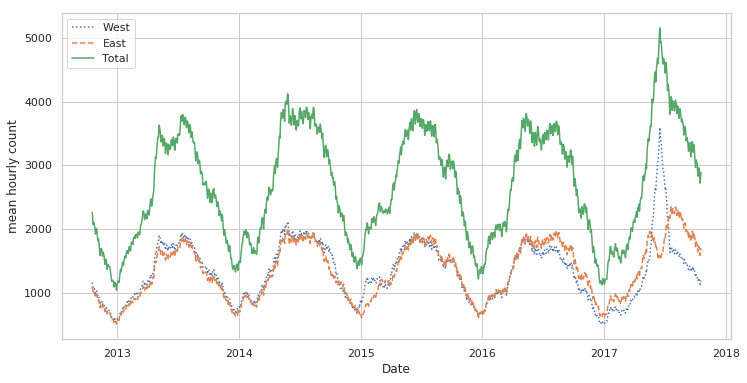

In [319]:
daily = data.resample('D').sum()
daily.rolling(30, center=True).mean().plot(style=[':', '--', '-'], figsize=(12,6))
plt.ylabel('mean hourly count');

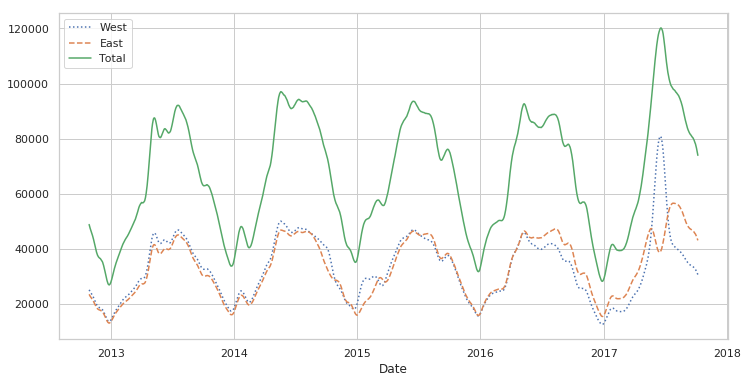

In [320]:
daily.rolling(50, center=True,
              win_type='gaussian').sum(std=10).plot(style=[':', '--', '-'],
                                                    figsize=(12,6));

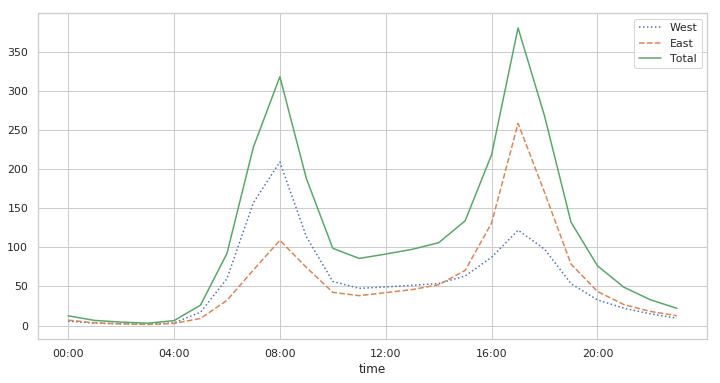

In [321]:
by_time = data.groupby(data.index.time).mean()
hourly_ticks = 60 * 60 * 4 * np.arange(6)  # sec * min * every4hours
by_time.plot(xticks=hourly_ticks, style=[':', '--', '-'], figsize=(12,6));

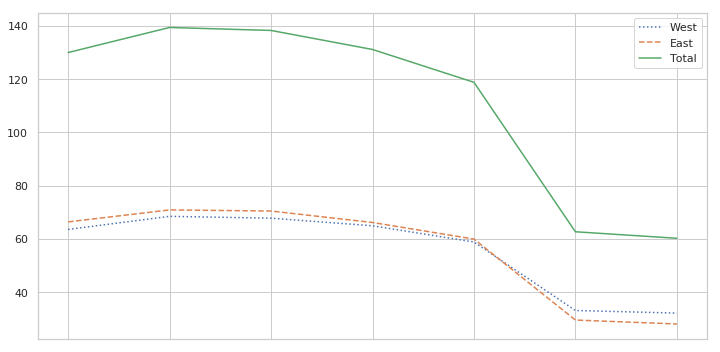

In [322]:
by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=[':', '--', '-'], figsize=(12,6));

In [323]:
weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend')
by_time = data.groupby([weekend, data.index.time]).mean()

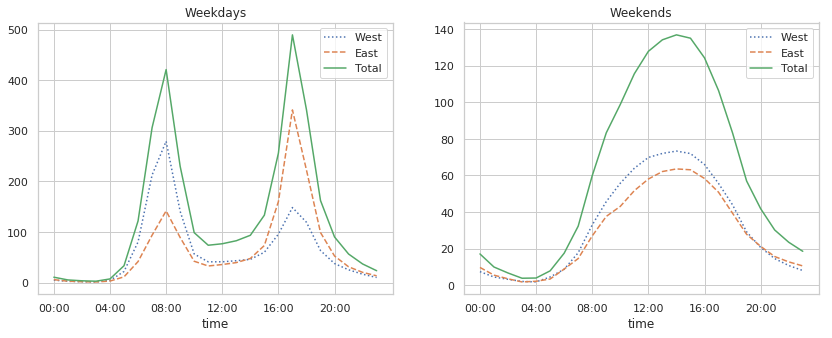

In [324]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
by_time.loc['Weekday'].plot(ax=ax[0], title='Weekdays',
                           xticks=hourly_ticks, style=[':', '--', '-'])
by_time.loc['Weekend'].plot(ax=ax[1], title='Weekends',
                           xticks=hourly_ticks, style=[':', '--', '-']);